In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/otavio/ml/datasets/trends/valentines.csv')

In [3]:
data['mes'] = data['semana'].apply(lambda x: x.split('-')[1])

In [4]:
data['ano'] = data['semana'].apply(lambda x: x.split('-')[0])

In [5]:
data['dia'] = data['semana'].apply(lambda x: x.split('-')[2])

In [6]:
new = data[data['mes'] == '06']
new = new[new['dia'].astype(int) >= 5]
new = new[new['dia'].astype(int) <= 12]

In [7]:
new

,semana,tax,mes,ano,dia
51,2016-06-05,45,06,2016,05
52,2016-06-12,42,06,2016,12
104,2017-06-11,77,06,2017,11
156,2018-06-10,95,06,2018,10
208,2019-06-09,100,06,2019,09
260,2020-06-07,41,06,2020,07


In [8]:
new['tax'] = new['tax'].apply(lambda x: int(x))

In [13]:
gb = new.groupby('ano')['tax'].mean().to_frame().reset_index()

In [18]:
blue = gb[gb['ano'].astype(int) < 2020]

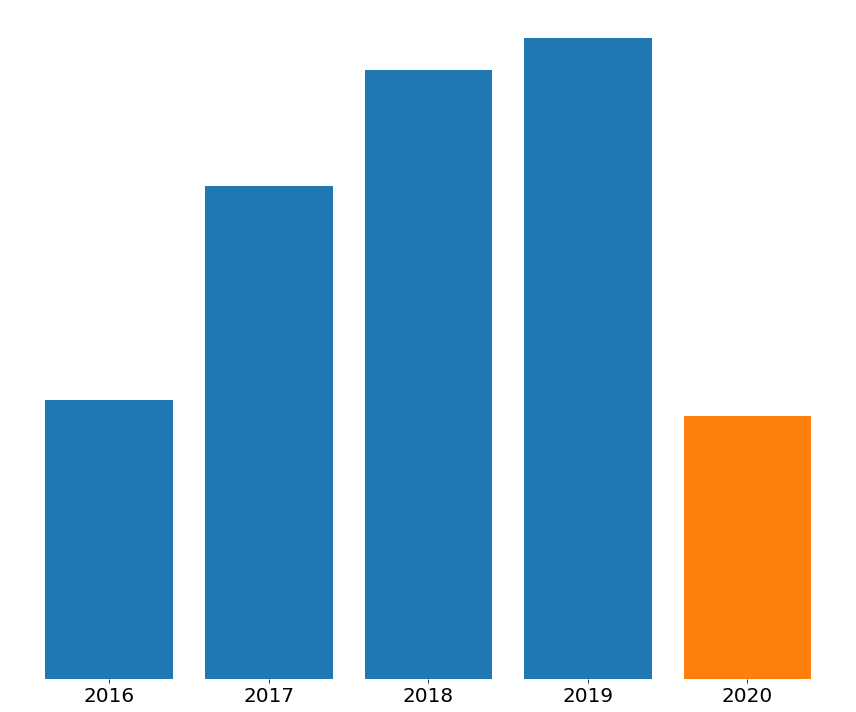

In [30]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(blue['ano'], blue['tax'])
ax.bar(gb['ano'][-1:], gb['tax'][-1:])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.xticks(size=20)
plt.tight_layout()
plt.savefig('out.png')